# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Dataset

In [30]:
data = pd.read_csv('C:\\Users\\MUDIT JAIN\\Desktop\\data\\train.csv') 


# Check for missing value and describe the data

In [3]:
data.isnull().sum()
data.head()
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


# Plotting the distribution of fake and genuine accounts

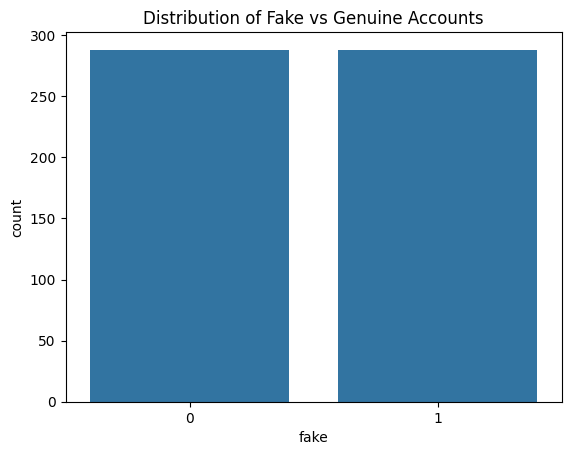

In [4]:
sns.countplot(x='fake', data=data)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()


# correlation analysis
# Correlation matrix

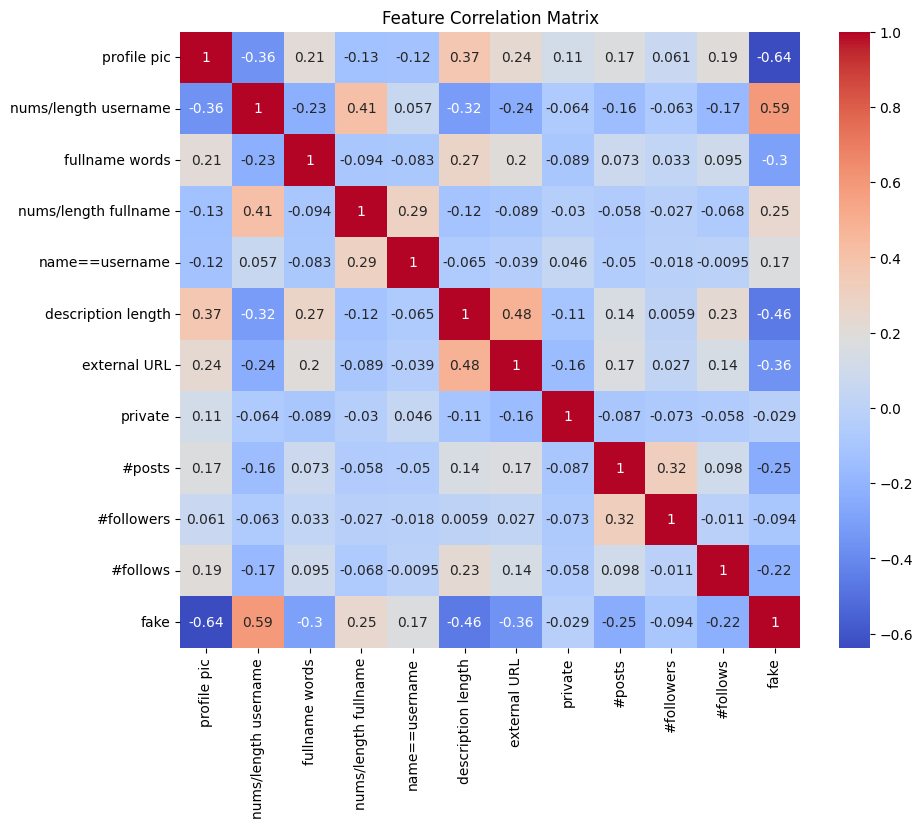

In [5]:
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Visualization of Key Features
# Profile Picture (Fake vs. Genuine):

C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_4400\2997912635.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake', y='profile pic', data=data,ci=None)


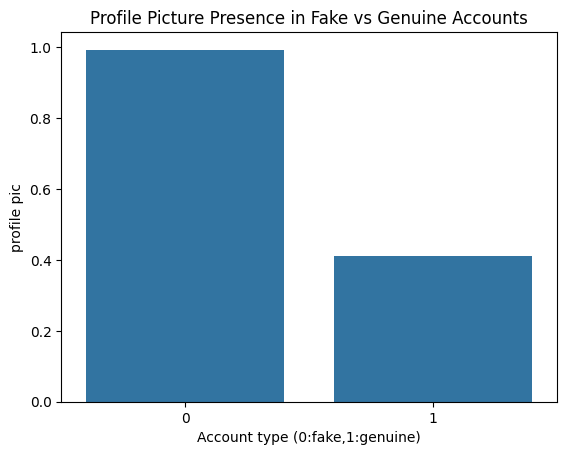

In [12]:
sns.barplot(x='fake', y='profile pic', data=data,ci=None)
plt.title("Profile Picture Presence in Fake vs Genuine Accounts")
plt.xlabel("Account type (0:fake,1:genuine)")
plt.show()

# Followers and Following Counts:

C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_4400\1056714307.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake', y='#followers', data=data,ci=None)


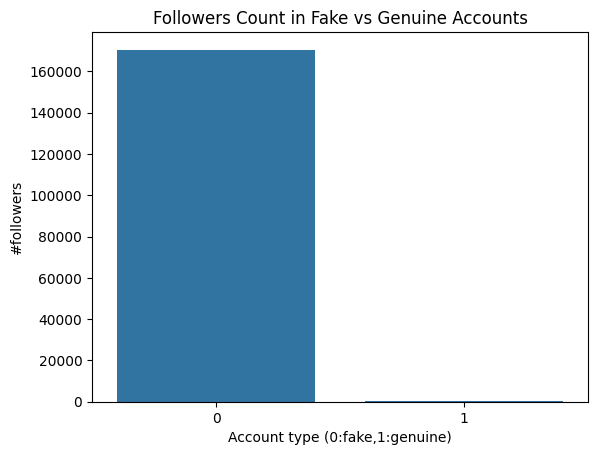

C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_4400\1056714307.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake', y='#follows', data=data,ci=None)


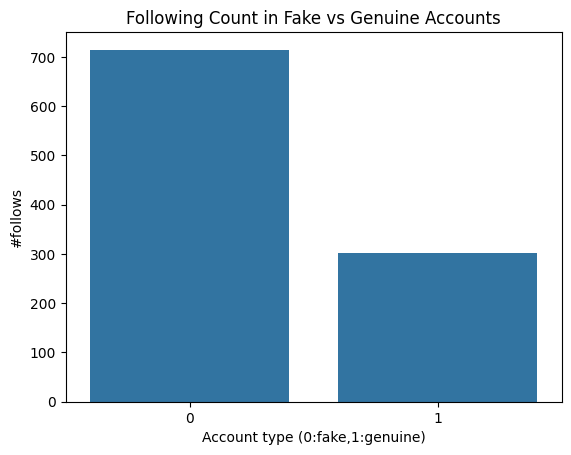

In [15]:
sns.barplot(x='fake', y='#followers', data=data,ci=None)
plt.title("Followers Count in Fake vs Genuine Accounts")
plt.xlabel("Account type (0:fake,1:genuine)")
plt.show()

sns.barplot(x='fake', y='#follows', data=data,ci=None)
plt.title("Following Count in Fake vs Genuine Accounts")
plt.xlabel("Account type (0:fake,1:genuine)")
plt.show()

# Posts Count:

C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_4400\2292949262.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fake', y='#posts', data=data,ci=None)


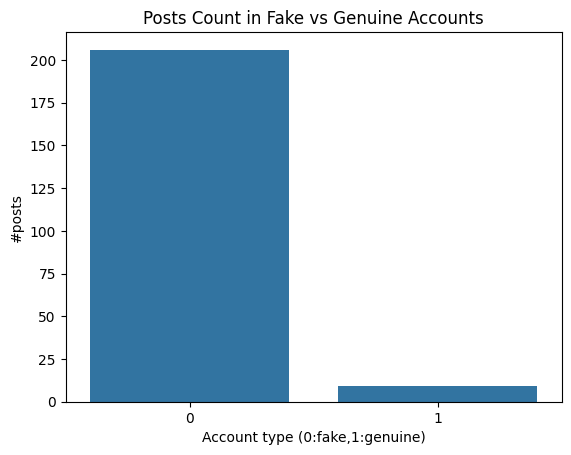

In [16]:
sns.barplot(x='fake', y='#posts', data=data,ci=None)
plt.title("Posts Count in Fake vs Genuine Accounts")
plt.xlabel("Account type (0:fake,1:genuine)")
plt.show()

# Feature Scaling 

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('fake',axis=1))
scaled_data = pd.DataFrame(scaled_features,columns=data.columns[:-1])
scaled_data['fake'] = data['fake']


# Split data into training and test sets

In [18]:
x = scaled_data.drop('fake', axis=1)
y = scaled_data['fake']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)

# Build Random Forest Model

In [19]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance Plot


C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_4400\1685595769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=x.columns[indices], x=importances[indices],palette='viridis')


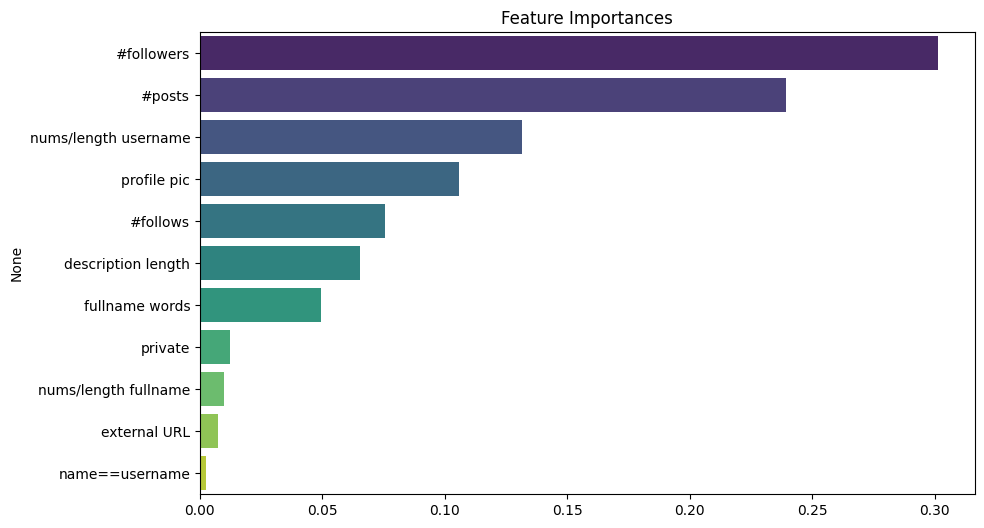

In [22]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(y=x.columns[indices], x=importances[indices],palette='viridis')
plt.show()


# Predictions and Metrics


In [23]:
y_pred = model.predict(x_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.930635838150289
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.95      0.90      0.92        80

    accuracy                           0.93       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173

Confusion Matrix:
 [[89  4]
 [ 8 72]]


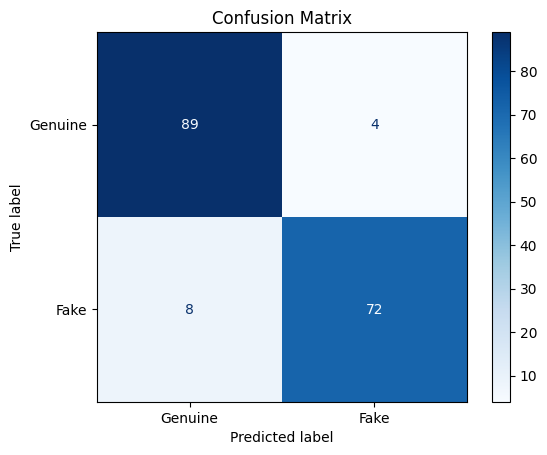

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()